# Data preprocessing and imputation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df_weather = pd.read_csv('data_weather.csv')

# Convert the 'date' column to a datetime format
df_weather['date'] = pd.to_datetime(df_weather['date'], format='%Y%m%d')

We can carry out some basic data analysis at this stage and view different properties of the dataset.

In [2]:
# View the first few records
print(df_weather.head())

# Basic statistics of the dataset
print(df_weather.describe())


        date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp   
0 1979-01-01          2.0       7.0              52.0       2.3       -4.1  \
1 1979-01-02          6.0       1.7              27.0       1.6       -2.6   
2 1979-01-03          5.0       0.0              13.0       1.3       -2.8   
3 1979-01-04          8.0       0.0              13.0      -0.3       -2.6   
4 1979-01-05          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  
                      date   cloud_cover      sunshine  global_radiation   
count                15341  15322.000000  15341.000000      15322.000000  \
mean   2000-01-01 00:00:00      5.268242      4.350238        118.756951 

### Data Imputation

In [3]:
# Check for missing values
print(df_weather.isnull().sum())

# Fill missing values using mean of the column - DATA IMPUTATION
for column in df_weather.columns:
    if df_weather[column].dtype == float:
        df_weather[column].fillna(df_weather[column].mean(), inplace=True)


date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64


In [4]:
print(df_weather.isnull().sum())

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64


In [5]:
average_cloud_cover = df_weather['cloud_cover'].mean()
print(f"Average Cloud Cover: {average_cloud_cover} oktas")

Average Cloud Cover: 5.268241743897663 oktas


In [6]:
max_sunshine = df_weather['sunshine'].max()
days_max_sunshine = df_weather[df_weather['sunshine'] == max_sunshine]
print(days_max_sunshine)

            date  cloud_cover  sunshine  global_radiation  max_temp   
15116 2020-05-21          5.0      16.0             380.0      27.5  \

       mean_temp  min_temp  precipitation  pressure  snow_depth  
15116       20.3      13.1            0.0  101920.0    0.037986  


In [7]:
correlation = df_weather['global_radiation'].corr(df_weather['sunshine'])
print(f"Correlation between Global Radiation and Sunshine: {correlation}")

Correlation between Global Radiation and Sunshine: 0.8499744683533531


In [8]:
# Correlation Analysis
correlation_matrix = df_weather.corr()

# Get correlations of each feature with respect to 'mean_temperature'
mean_temperature_corr = correlation_matrix['mean_temp']

# Sort the correlations
sorted_corr = mean_temperature_corr.sort_values(ascending=False)

# Print sorted correlations
print("Sorted correlations with respect to mean temperature:")
print(sorted_corr)

Sorted correlations with respect to mean temperature:
mean_temp           1.000000
min_temp            0.954532
max_temp            0.911442
global_radiation    0.633862
sunshine            0.396130
date                0.098959
pressure            0.004758
precipitation      -0.010455
cloud_cover        -0.110273
snow_depth         -0.147051
Name: mean_temp, dtype: float64


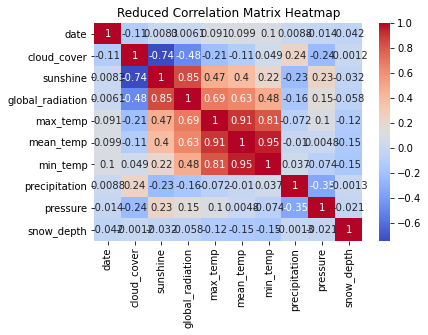

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Draw a heatmap of the reduced correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Reduced Correlation Matrix Heatmap')
plt.show()

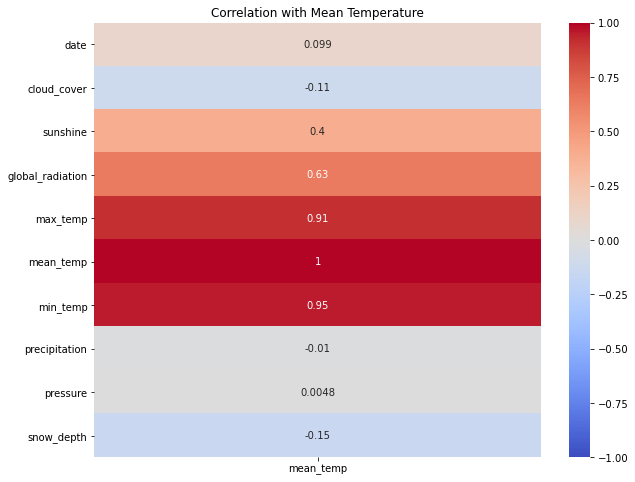

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df_weather.corr()

# Filter out correlations with only 'mean_temp'
corr_with_mean_temp = corr_matrix[['mean_temp']]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_mean_temp, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation with Mean Temperature")
plt.show()

<AxesSubplot:>

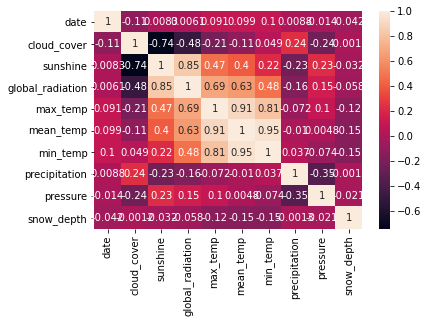

In [11]:
# Correlation heatmap 

sns.heatmap(df_weather.corr(), annot = True)

In [12]:
# Getting the maximum date to identify the most recent date
max_date = df_weather['date'].max()

# Filter out the records for the most recent 5 years
df_last_5_years = df_weather[df_weather['date'] > (max_date - pd.DateOffset(years=5))]

In [13]:
# Setting the date as the index for resampling
df_last_5_years.set_index('date', inplace=True)

# Resampling data by weeks and computing the mean for each week
weekly_data = df_last_5_years.resample('W').mean()

# Resampling data by years and computing the mean for each year
yearly_data = df_last_5_years.resample('A').mean()


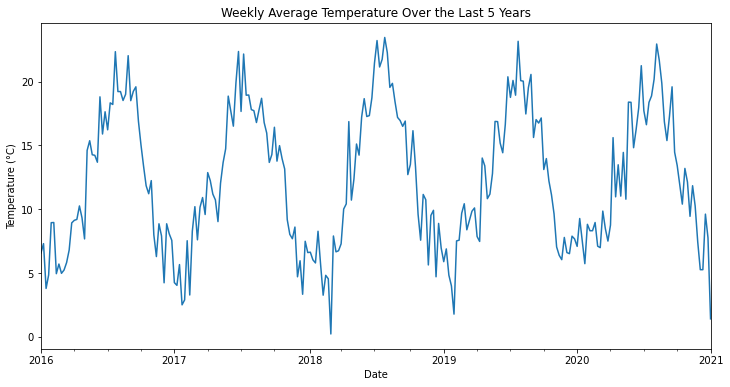

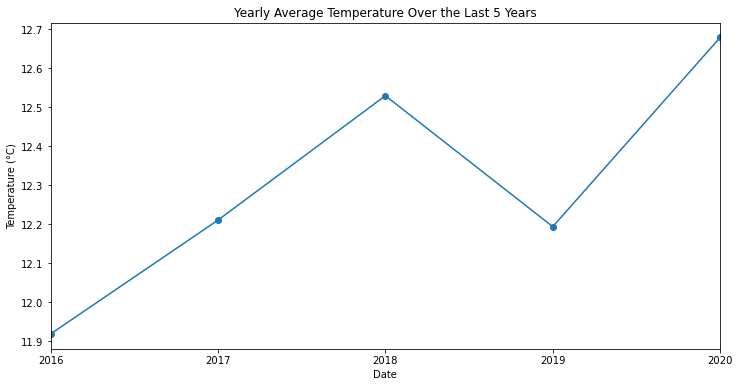

In [14]:
import matplotlib.pyplot as plt

# Weekly mean temperature
plt.figure(figsize=(12, 6))
weekly_data['mean_temp'].plot()
plt.title('Weekly Average Temperature Over the Last 5 Years')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.show()

# Yearly mean temperature
plt.figure(figsize=(12, 6))
yearly_data['mean_temp'].plot(marker='o')
plt.title('Yearly Average Temperature Over the Last 5 Years')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.show()


# Training the model

In [15]:
# Filter the last 5 years for testing
test_data = df_weather[df_weather['date'] > (max_date - pd.DateOffset(years=5))]

# Use the remaining data for training
train_data = df_weather[df_weather['date'] <= (max_date - pd.DateOffset(years=5))]

# Drop the 'date' column as it's not a feature for training
train_data = train_data.drop(columns=['date'])
test_data = test_data.drop(columns=['date'])

# Splitting into features and target
X_train = train_data.drop(columns=['mean_temp'])
y_train = train_data['mean_temp']

X_test = test_data.drop(columns=['mean_temp'])
y_test = test_data['mean_temp']


### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [36]:
import numpy as np

# 1 day ahead prediction
one_day_predictions = model.predict(X_test)

# 1 week ahead prediction

# For simplicity, we'll predict for the entire week and then take the last value
one_week_predictions = []
for i in range(len(X_test) - 7):
    one_week_data = X_test.iloc[i:i+7]
    week_prediction = model.predict(one_week_data)
    one_week_predictions.append(week_prediction[-1])

# Converting the list to a numpy array for easier operations later
one_week_predictions = np.array(one_week_predictions)


In [37]:
from sklearn.metrics import mean_squared_error

# For 1 day ahead
mse_one_day = mean_squared_error(y_test, one_day_predictions)
rmse_one_day = np.sqrt(mse_one_day)

# For 1 week ahead (considering we'll miss the last 7 values in y_test)
mse_one_week = mean_squared_error(y_test[:-7], one_week_predictions)
rmse_one_week = np.sqrt(mse_one_week)

print(f"1 Day Ahead: MSE = {mse_one_day}, RMSE = {rmse_one_day}")
print(f"1 Week Ahead: MSE = {mse_one_week}, RMSE = {rmse_one_week}")


1 Day Ahead: MSE = 0.9373134848274379, RMSE = 0.9681495157399181
1 Week Ahead: MSE = 13.919391714211871, RMSE = 3.7308701014926626


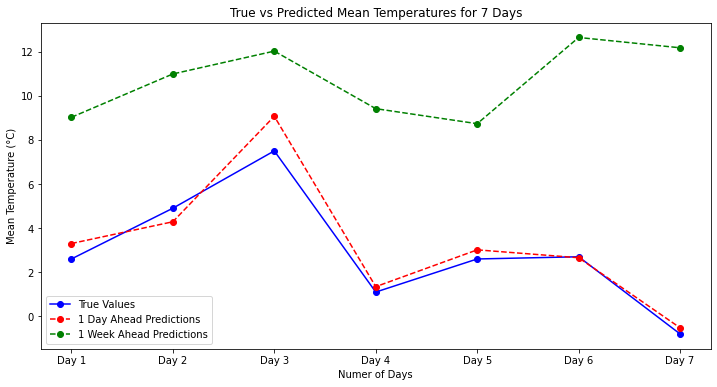

In [38]:
# Select the last 7 days
y_test_7_days = y_test[-7:].values
one_day_predictions_7_days = one_day_predictions[-7:]

# For 1 week predictions, we will miss the last 7 values, so we take [-14:-7] for the 1 week ahead predictions
one_week_predictions_7_days = one_week_predictions[-14:-7]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test_7_days, label='True Values', color='blue', marker='o')
plt.plot(one_day_predictions_7_days, label='1 Day Ahead Predictions', color='red', linestyle='--', marker='o')
plt.plot(one_week_predictions_7_days, label='1 Week Ahead Predictions', color='green', linestyle='--', marker='o')
plt.xticks(ticks=np.arange(7), labels=[f"Day {i}" for i in range(1, 8)])
plt.legend()
plt.title('True vs Predicted Mean Temperatures for 7 Days')
plt.xlabel('Numer of Days')
plt.ylabel('Mean Temperature (°C)')
plt.show()


### Random Forest Regression

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from pprint import pprint

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

In [40]:
# Display current settings of hyperparameters
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [41]:
# Hyperparameter grid to be searched
random_grid = {
    'n_estimators': [int(x) for x in np.linspace(200, 2000, 10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, 11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [42]:
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [43]:
# Perform random search for best hyperparameters
rf_random = RandomizedSearchCV(
    estimator=rf, param_distributions=random_grid, n_iter=100,
    cv=3, verbose=2, random_state=42, n_jobs=-1
)

# Assuming train_features and train_labels are your training set
rf_random.fit(X_train, y_train)

# Display the best parameters
print('Best parameters: ', rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [118]:
# Display the best parameters
print('Best parameters: ', rf_random.best_params_)

Best parameters:  {'n_estimators': 1600, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


In [119]:
# Evaluation function
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print(f'Average Error: {np.mean(errors):0.4f} degrees.')
    print(f'Accuracy = {accuracy:0.2f}%.')
    
    return accuracy

In [120]:
# Base model for comparison
base_model = RandomForestRegressor(n_estimators=10, random_state=42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.7522 degrees.
Accuracy = 92.06%.


In [121]:
# Best model from random search
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.7107 degrees.
Accuracy = 92.61%.


In [122]:
# 1 day ahead prediction
one_day_predictions_rf = best_random.predict(X_test)

In [123]:
# 1 week ahead prediction
one_week_predictions_rf = []
for i in range(len(X_test) - 7):
    one_week_data = X_test.iloc[i:i+7]
    week_prediction = best_random.predict(one_week_data)
    one_week_predictions_rf.append(np.mean(week_prediction))

one_week_predictions_rf = np.array(one_week_predictions_rf)

[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time= 2.2min
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  22.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=  21.4s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  18.3s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=26.1min
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=  11.2s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  17.2s
[CV] END bootstrap=True, max_depth=90,

In [91]:
# MSE and RMSE calculations
mse_one_day_rf = mean_squared_error(y_test, one_day_predictions_rf)
rmse_one_day_rf = np.sqrt(mse_one_day_rf)

mse_one_week_rf = mean_squared_error(y_test[:-7], one_week_predictions_rf)
rmse_one_week_rf = np.sqrt(mse_one_week_rf)

print(f"Random Forest - 1 Day Ahead: MSE = {mse_one_day_rf}, RMSE = {rmse_one_day_rf}")
print(f"Random Forest - 1 Week Ahead: MSE = {mse_one_week_rf}, RMSE = {rmse_one_week_rf}")

Random Forest - 1 Day Ahead: MSE = 0.9880285185845469, RMSE = 0.9939962367054248
Random Forest - 1 Week Ahead: MSE = 5.570090484847278, RMSE = 2.3601039139934663


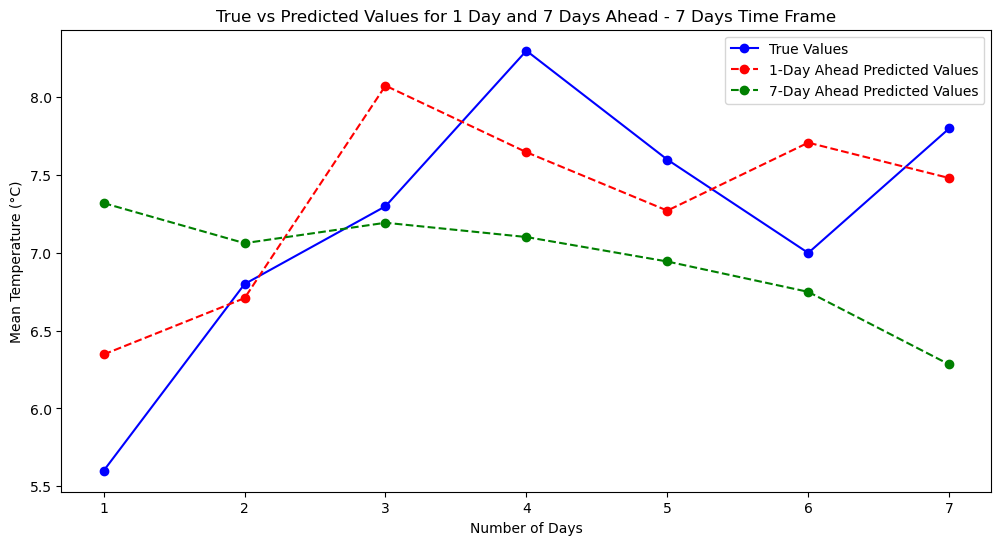

In [128]:
import matplotlib.pyplot as plt

# Select the first 7 days from true and predicted values
true_values_7_days = y_test[:7]
predicted_values_1_day_7_days = one_day_predictions_rf[:7]
predicted_values_7_day_7_days = one_week_predictions_rf[:7]

# Create a time index for plotting
time_index_7_days = range(1, 8)  # 1 to 7 for a week

# Create the plot
plt.figure(figsize=(12, 6))

plt.plot(time_index_7_days, true_values_7_days, label='True Values', color='blue', marker='o')
plt.plot(time_index_7_days, predicted_values_1_day_7_days, label='1-Day Ahead Predicted Values',color='red', linestyle='--', marker='o')
plt.plot(time_index_7_days, predicted_values_7_day_7_days, label='7-Day Ahead Predicted Values', color='green', linestyle='--', marker='o')

plt.xlabel('Number of Days')
plt.ylabel('Mean Temperature (°C)')
plt.title('True vs Predicted Values for 1 Day and 7 Days Ahead - 7 Days Time Frame')
plt.legend()

plt.show()

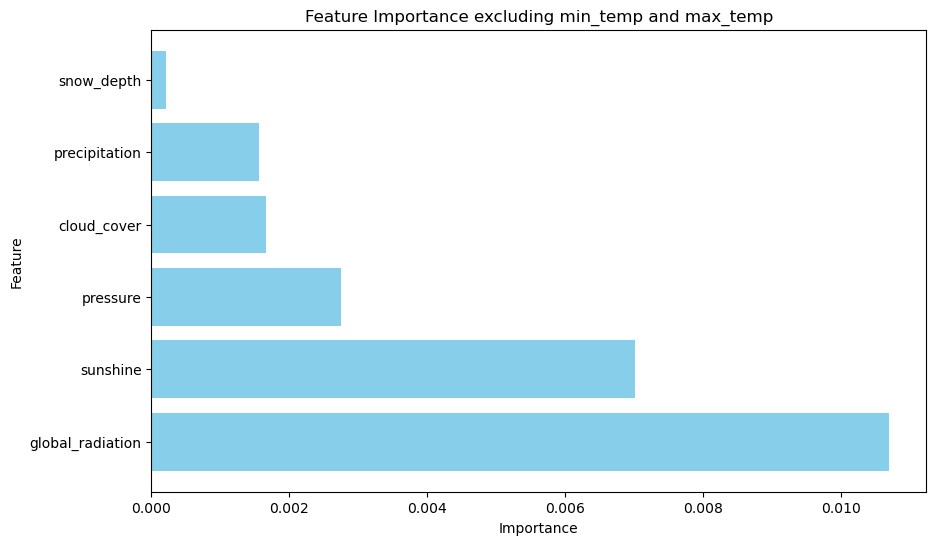

            Feature  Importance
2  global_radiation    0.010694
1          sunshine    0.007011
6          pressure    0.002752
0       cloud_cover    0.001663
5     precipitation    0.001562
7        snow_depth    0.000211


In [131]:
# Extract feature importances from the fitted model
feature_importances = best_random.feature_importances_

# Create a DataFrame for the importances
features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Exclude 'min_temp' and 'max_temp'
features = features[~features['Feature'].isin(['min_temp', 'max_temp'])]

# Sort the features by their importance
features = features.sort_values(by='Importance', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(features['Feature'], features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance excluding min_temp and max_temp')
plt.show()

# Display the features DataFrame
print(features)


### RNN

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [35]:
dataset = df_weather[['mean_temp']].values.astype('float32')

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [36]:
# Function to create dataset
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

# Create dataset
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input for LSTM [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [37]:
# Create and fit the LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
10276/10276 - 9s - loss: 0.0053 - 9s/epoch - 874us/step
Epoch 2/100
10276/10276 - 8s - loss: 0.0030 - 8s/epoch - 772us/step
Epoch 3/100
10276/10276 - 8s - loss: 0.0030 - 8s/epoch - 782us/step
Epoch 4/100
10276/10276 - 8s - loss: 0.0029 - 8s/epoch - 771us/step
Epoch 5/100
10276/10276 - 8s - loss: 0.0030 - 8s/epoch - 749us/step
Epoch 6/100
10276/10276 - 8s - loss: 0.0029 - 8s/epoch - 761us/step
Epoch 7/100
10276/10276 - 8s - loss: 0.0030 - 8s/epoch - 766us/step
Epoch 8/100
10276/10276 - 8s - loss: 0.0029 - 8s/epoch - 775us/step
Epoch 9/100
10276/10276 - 8s - loss: 0.0030 - 8s/epoch - 773us/step
Epoch 10/100
10276/10276 - 8s - loss: 0.0029 - 8s/epoch - 783us/step
Epoch 11/100
10276/10276 - 8s - loss: 0.0029 - 8s/epoch - 778us/step
Epoch 12/100
10276/10276 - 8s - loss: 0.0029 - 8s/epoch - 774us/step
Epoch 13/100
10276/10276 - 8s - loss: 0.0029 - 8s/epoch - 752us/step
Epoch 14/100
10276/10276 - 8s - loss: 0.0029 - 8s/epoch - 760us/step
Epoch 15/100
10276/10276 - 8s - loss: 0.002

In [38]:
# Make predictions
testPredict = model.predict(testX)

159/159 [==============================] - 0s 621us/step


In [39]:
# Invert the predictions
testPredict = scaler.inverse_transform(testPredict)
testY_actual = scaler.inverse_transform([testY])[0]

In [40]:
# 1-day ahead prediction
one_day_predictions_lstm = testPredict.flatten()

In [41]:
# 1-week ahead prediction
one_week_predictions_lstm = []
for i in range(len(testX) - 7):
    one_week_data = testX[i:i+7, :, :]
    week_prediction = model.predict(one_week_data)
    one_week_predictions_lstm.append(week_prediction[-1])

one_week_predictions_lstm = scaler.inverse_transform(one_week_predictions_lstm)


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


In [42]:
# MSE and RMSE calculation for 1-day ahead
mse_one_day_lstm = mean_squared_error(testY_actual, one_day_predictions_lstm)
rmse_one_day_lstm = np.sqrt(mse_one_day_lstm)

In [43]:
# MSE and RMSE calculation for 1-week ahead
mse_one_week_lstm = mean_squared_error(testY_actual[:-7], one_week_predictions_lstm)
rmse_one_week_lstm = np.sqrt(mse_one_week_lstm)

In [44]:

print(f"LSTM - 1 Day Ahead: MSE = {mse_one_day_lstm}, RMSE = {rmse_one_day_lstm}")
print(f"LSTM - 1 Week Ahead: MSE = {mse_one_week_lstm}, RMSE = {rmse_one_week_lstm}")


LSTM - 1 Day Ahead: MSE = 4.04155879124528, RMSE = 2.010362850642958
LSTM - 1 Week Ahead: MSE = 11.273553666012493, RMSE = 3.3576113035925546


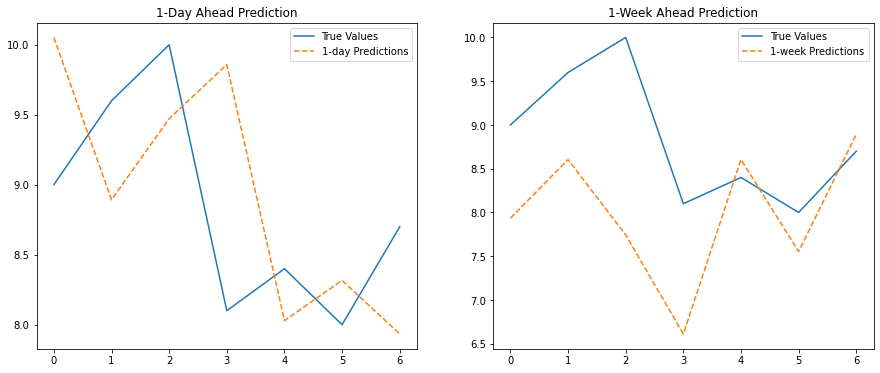

In [45]:
# Plotting only 7 days for 1-day and 1-week ahead
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(testY_actual[:7], label='True Values')
plt.plot(one_day_predictions_lstm[:7], label='1-day Predictions', linestyle='dashed')
plt.title('1-Day Ahead Prediction')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(testY_actual[:7], label='True Values')
plt.plot(one_week_predictions_lstm[:7], label='1-week Predictions', linestyle='dashed')
plt.title('1-Week Ahead Prediction')
plt.legend()

plt.show()

# Hyperparameter Tuning - RNN

In [46]:
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

<ipython-input-46-ad1275e5996c>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


In [47]:
# Define HyperModel class
class LSTMHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    
    def build(self, hp):
        model = Sequential()
        model.add(LSTM(units=hp.Int('units', min_value=4, max_value=64, step=4),
                       input_shape=self.input_shape))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error',
                      optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])))
        return model

# Instantiate the HyperModel class
input_shape = (trainX.shape[1], trainX.shape[2])  # Make sure to replace this with your actual input shape
hypermodel = LSTMHyperModel(input_shape=input_shape)

In [48]:
# Initialize the tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=10,
    seed=42,
    executions_per_trial=2
)

# Perform hyperparameter search
tuner.search(trainX, trainY, epochs=20, validation_split=0.2, verbose=1)

# Get the best model and print a summary of the model
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

# Retrieve optimal hyperparameters
best_hp = tuner.get_best_hyperparameters()[0]
print("Best hyperparameters:", best_hp.get_config()['values'])

Trial 10 Complete [00h 00m 17s]
val_loss: 0.003060897928662598

Best val_loss So Far: 0.0030544132459908724
Total elapsed time: 00h 03m 14s
INFO:tensorflow:Oracle triggered exit
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 44)                8096      
                                                                 
 dense (Dense)               (None, 1)                 45        
                                                                 
Total params: 8141 (31.80 KB)
Trainable params: 8141 (31.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Best hyperparameters: {'units': 44, 'learning_rate': 0.01}


In [49]:
# Retrieve best hyperparameters from tuning
best_units = best_hp.get('units')
best_learning_rate = best_hp.get('learning_rate')

In [50]:
# Create and fit the LSTM network with best hyperparameters
best_model = Sequential()
best_model.add(LSTM(best_units, input_shape=input_shape))
best_model.add(Dense(1))
best_model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=best_learning_rate))
best_model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
10276/10276 - 9s - loss: 0.0041 - 9s/epoch - 897us/step
Epoch 2/100
10276/10276 - 8s - loss: 0.0035 - 8s/epoch - 811us/step
Epoch 3/100
10276/10276 - 8s - loss: 0.0034 - 8s/epoch - 812us/step
Epoch 4/100
10276/10276 - 8s - loss: 0.0033 - 8s/epoch - 821us/step
Epoch 5/100
10276/10276 - 8s - loss: 0.0034 - 8s/epoch - 806us/step
Epoch 6/100
10276/10276 - 8s - loss: 0.0033 - 8s/epoch - 802us/step
Epoch 7/100
10276/10276 - 8s - loss: 0.0033 - 8s/epoch - 800us/step
Epoch 8/100
10276/10276 - 8s - loss: 0.0033 - 8s/epoch - 781us/step
Epoch 9/100
10276/10276 - 8s - loss: 0.0033 - 8s/epoch - 802us/step
Epoch 10/100
10276/10276 - 9s - loss: 0.0033 - 9s/epoch - 829us/step
Epoch 11/100
10276/10276 - 8s - loss: 0.0033 - 8s/epoch - 809us/step
Epoch 12/100
10276/10276 - 8s - loss: 0.0033 - 8s/epoch - 782us/step
Epoch 13/100
10276/10276 - 8s - loss: 0.0033 - 8s/epoch - 804us/step
Epoch 14/100
10276/10276 - 8s - loss: 0.0033 - 8s/epoch - 802us/step
Epoch 15/100
10276/10276 - 8s - loss: 0.003

10276/10276 - 8s - loss: 0.0033 - 8s/epoch - 805us/step
Epoch 99/100
10276/10276 - 8s - loss: 0.0032 - 8s/epoch - 806us/step
Epoch 100/100
10276/10276 - 8s - loss: 0.0032 - 8s/epoch - 796us/step


In [51]:
# Make 1-day and 1-week ahead predictions
# For 1-day
one_day_predictions_lstm = best_model.predict(testX)

159/159 [==============================] - 0s 735us/step


In [52]:
# For 1-week
one_week_predictions_lstm = []
for i in range(len(testX) - 7):
    one_week_data = testX[i:i+7]
    week_prediction = best_model.predict(one_week_data)
    one_week_predictions_lstm.append(week_prediction[-1][0])

# Convert to NumPy array for consistency
one_week_predictions_lstm = np.array(one_week_predictions_lstm)

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


In [55]:
# Inverse transform the predicted and actual values
one_day_predictions_lstm_original = scaler.inverse_transform(one_day_predictions_lstm)
one_week_predictions_lstm_original = scaler.inverse_transform(one_week_predictions_lstm.reshape(-1, 1))
testY_original = scaler.inverse_transform(testY.reshape(-1, 1))

In [56]:
# Compute MSE and RMSE in the original scale
mse_one_day_lstm = mean_squared_error(testY_original, one_day_predictions_lstm_original)
rmse_one_day_lstm = np.sqrt(mse_one_day_lstm)

mse_one_week_lstm = mean_squared_error(testY_original[:-7], one_week_predictions_lstm_original)
rmse_one_week_lstm = np.sqrt(mse_one_week_lstm)

print(f"LSTM - 1 Day Ahead: MSE = {mse_one_day_lstm}, RMSE = {rmse_one_day_lstm}")
print(f"LSTM - 1 Week Ahead: MSE = {mse_one_week_lstm}, RMSE = {rmse_one_week_lstm}")

LSTM - 1 Day Ahead: MSE = 4.157580852508545, RMSE = 2.0390145778656006
LSTM - 1 Week Ahead: MSE = 11.56688404083252, RMSE = 3.4010121822357178


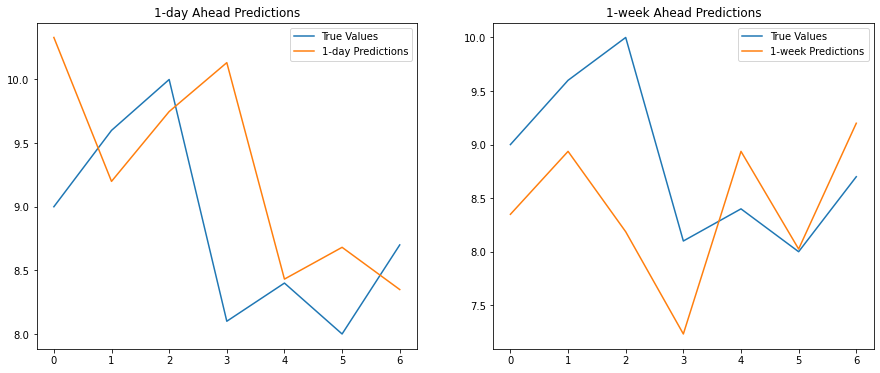

In [57]:
# Plotting the results for a 7-day time frame
plt.figure(figsize=(15, 6))

# 1-day ahead predictions
plt.subplot(1, 2, 1)
plt.plot(testY_original[:7], label='True Values')
plt.plot(one_day_predictions_lstm_original[:7], label='1-day Predictions')
plt.title('1-day Ahead Predictions')
plt.legend()

# 1-week ahead predictions
plt.subplot(1, 2, 2)
plt.plot(testY_original[:7], label='True Values')
plt.plot(one_week_predictions_lstm_original[:7], label='1-week Predictions')
plt.title('1-week Ahead Predictions')
plt.legend()

plt.show()

157/157 [==============================] - 0s 738us/step
Global feature importances:
                      Feature     1_day    1_week
1         Time Step 1 <= 0.39  0.261039  0.260122
0  0.39 < Time Step 1 <= 0.51  0.085074  0.085308
2  0.51 < Time Step 1 <= 0.64  0.084363  0.084876


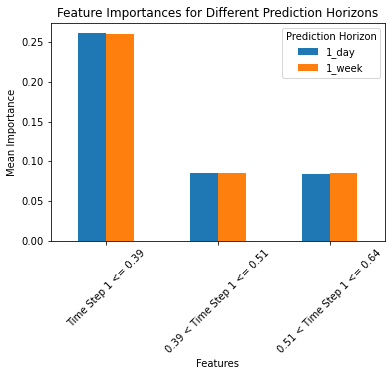

In [74]:
##### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lime import lime_tabular

def predict_2D(data_2D):
    data_3D = data_2D.reshape((data_2D.shape[0], 1, look_back))
    return best_model.predict(data_3D)

explainer = lime_tabular.LimeTabularExplainer(trainX_2D,
                                              training_labels=trainY,
                                              feature_names=["Time Step {}".format(i+1) for i in range(look_back)],
                                              mode='regression')

def get_feature_importance(num_instances=50):
    feature_importance_dict = {}
    for i in range(num_instances):
        exp = explainer.explain_instance(testX_2D[i], predict_2D)
        for feature, importance in exp.as_list():
            if feature in feature_importance_dict:
                feature_importance_dict[feature].append(importance)
            else:
                feature_importance_dict[feature] = [importance]
    mean_feature_importance = {k: np.mean(np.abs(v)) for k, v in feature_importance_dict.items()}
    return mean_feature_importance

# Get feature importances for 1-day ahead predictions
one_day_importances = get_feature_importance()

# Get feature importances for 1-week ahead predictions
# You would get these from a different model or different setting
one_week_importances = get_feature_importance()  # Hypothetical for now

# Convert to DataFrames
df_one_day = pd.DataFrame(list(one_day_importances.items()), columns=['Feature', '1_day'])
df_one_week = pd.DataFrame(list(one_week_importances.items()), columns=['Feature', '1_week'])

# Merge DataFrames
df = pd.merge(df_one_day, df_one_week, on='Feature')

# Sort by importance for 1-day predictions
df = df.sort_values(by='1_day', ascending=False)

print("Global feature importances:")
print(df)

# Create a bar plot
df.plot(x='Feature', y=['1_day', '1_week'], kind='bar')

plt.title('Feature Importances for Different Prediction Horizons')
plt.xlabel('Features')
plt.ylabel('Mean Importance')
plt.xticks(rotation=45)
plt.legend(title='Prediction Horizon')

plt.show()


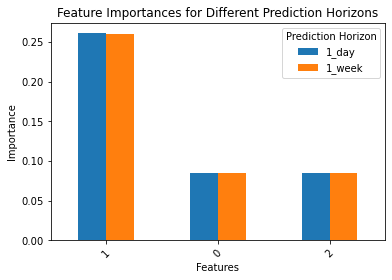

In [75]:
import matplotlib.pyplot as plt

# Create a bar plot for the DataFrame
df.plot(kind='bar')

plt.title('Feature Importances for Different Prediction Horizons')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.legend(title='Prediction Horizon')

plt.show()